In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
#from cuml.manifold import TSNE as cumlTSNE
import pyopencl as cl
import pycuda.driver 
from numba import jit

ModuleNotFoundError: No module named 'pycuda'

# import dataset

In [2]:
cell_type = 'K562'
experiment = 'GSM4041593_K562_rep1.hg38'
k = 2


In [3]:
k_mer_path = '/Users/pitikov_egor/Documents/CourseWork/genomes/reds_experiments/%s/parsed_contacts_%s/rna_kmers_number/%s_mers' % (cell_type, experiment, k)
cont_data_path = '/Users/pitikov_egor/Documents/CourseWork/genomes/reds_experiments/%s/parsed_contacts_%s' % (cell_type, experiment)

In [4]:
def make_sets_all(k_mer_table, contact_data_table):
    k_mers = pd.read_table(k_mer_table, sep='\t', header=None)
    contacts = pd.read_table(contact_data_table, sep='\t')
    contacts = contacts[contacts['pval']!='False']
    contacts = contacts.astype({"pval": float, 'contacts_count': int, 'rnaseq_count': int, 'zscore': float})
    out_table = pd.merge(left=contacts, right=k_mers, left_on='id', right_on=0, how ='inner')
    return out_table

In [5]:
chr_names=['chrX', 'chrY']
for i in range(1, 23):
    chr_names.append('chr%d' % (i))

In [6]:
all_all_kmers = make_sets_all('%s/%s.tsv' % (k_mer_path, chr_names[0]), '%s/%s_full_%s.pvalue.tab.txt' % (cont_data_path, chr_names[0], cell_type)) 
for i in chr_names[1:]:
    all_all_kmers = pd.concat([
        all_all_kmers,
        make_sets_all('%s/%s.tsv' % (k_mer_path, i), '%s/%s_full_%s.pvalue.tab.txt' % (cont_data_path, i, cell_type))],
        sort=False)

/Users/pitikov_egor/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [7]:
all_all_kmers = all_all_kmers.to_numpy()

In [8]:
all_all_kmers[:100000, 11:]

array([[13, 5, 7, ..., 12, 8, 16],
       [33, 4, 23, ..., 4, 20, 22],
       [22, 7, 11, ..., 8, 14, 18],
       ...,
       [25, 8, 14, ..., 13, 16, 22],
       [19, 7, 10, ..., 7, 7, 18],
       [9, 2, 11, ..., 4, 11, 15]], dtype=object)

# TSNE 


In [ ]:
model = TSNE(learning_rate=20)
transformed = model.fit_transform(all_all_kmers[:100000, 11:])

In [ ]:
len(transformed)

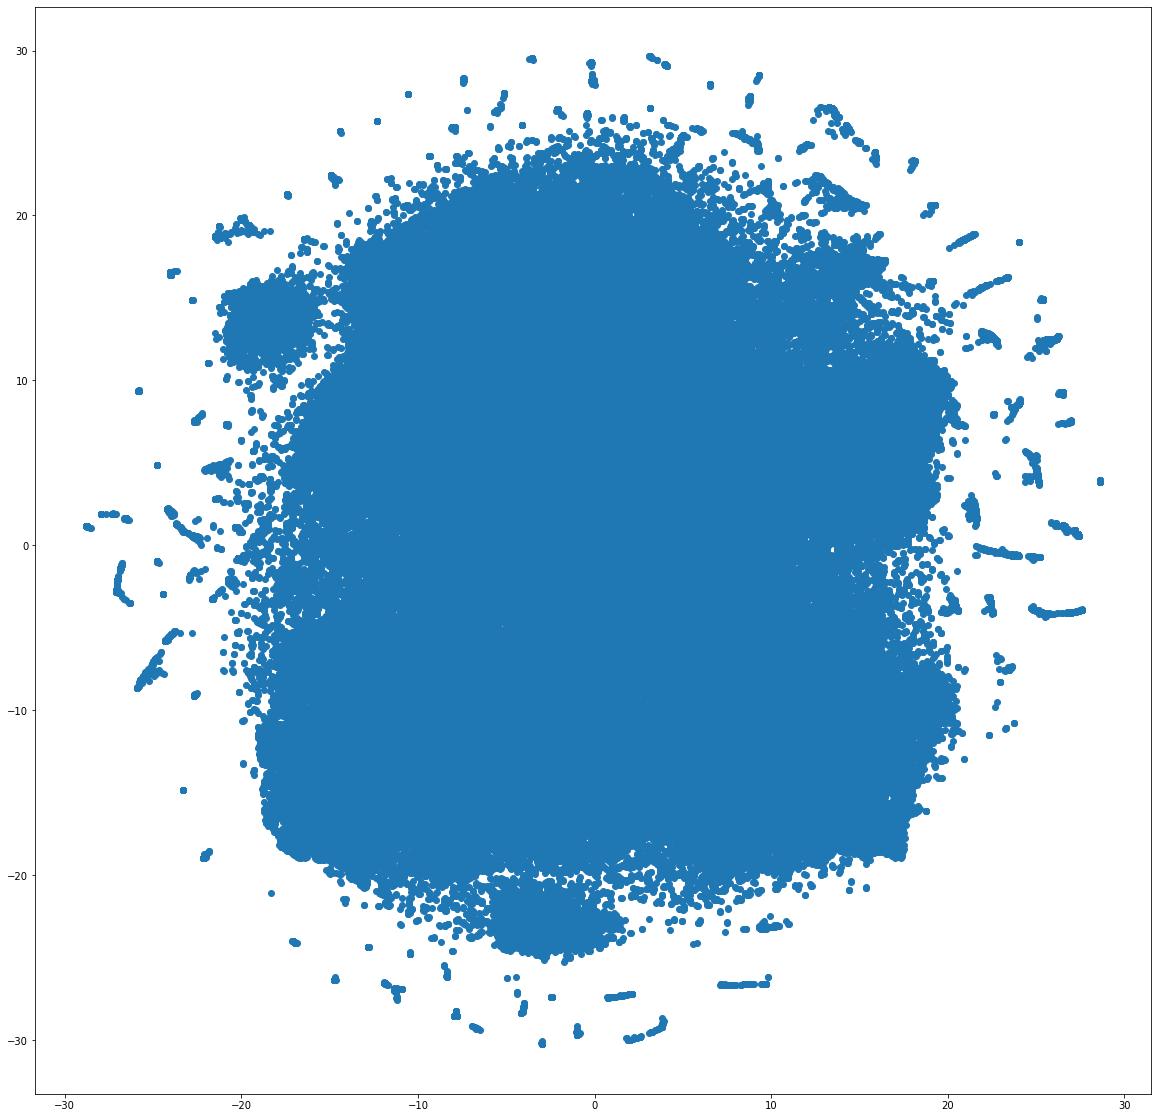

<Figure size 432x288 with 0 Axes>

In [13]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

fig = plt.figure(figsize=(20,20))
plt.scatter(x_axis, y_axis)
plt.show()
plt.savefig('clusters_2_mers_10_5_samples_notnorm.png', dpi=600, format='png')

# PCA

In [14]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(kmer_count)
pca_result[:,0]

array([-0.01295125, -0.02707397,  0.01826554, ...,  0.02330299,
       -0.03546251, -0.02479002])

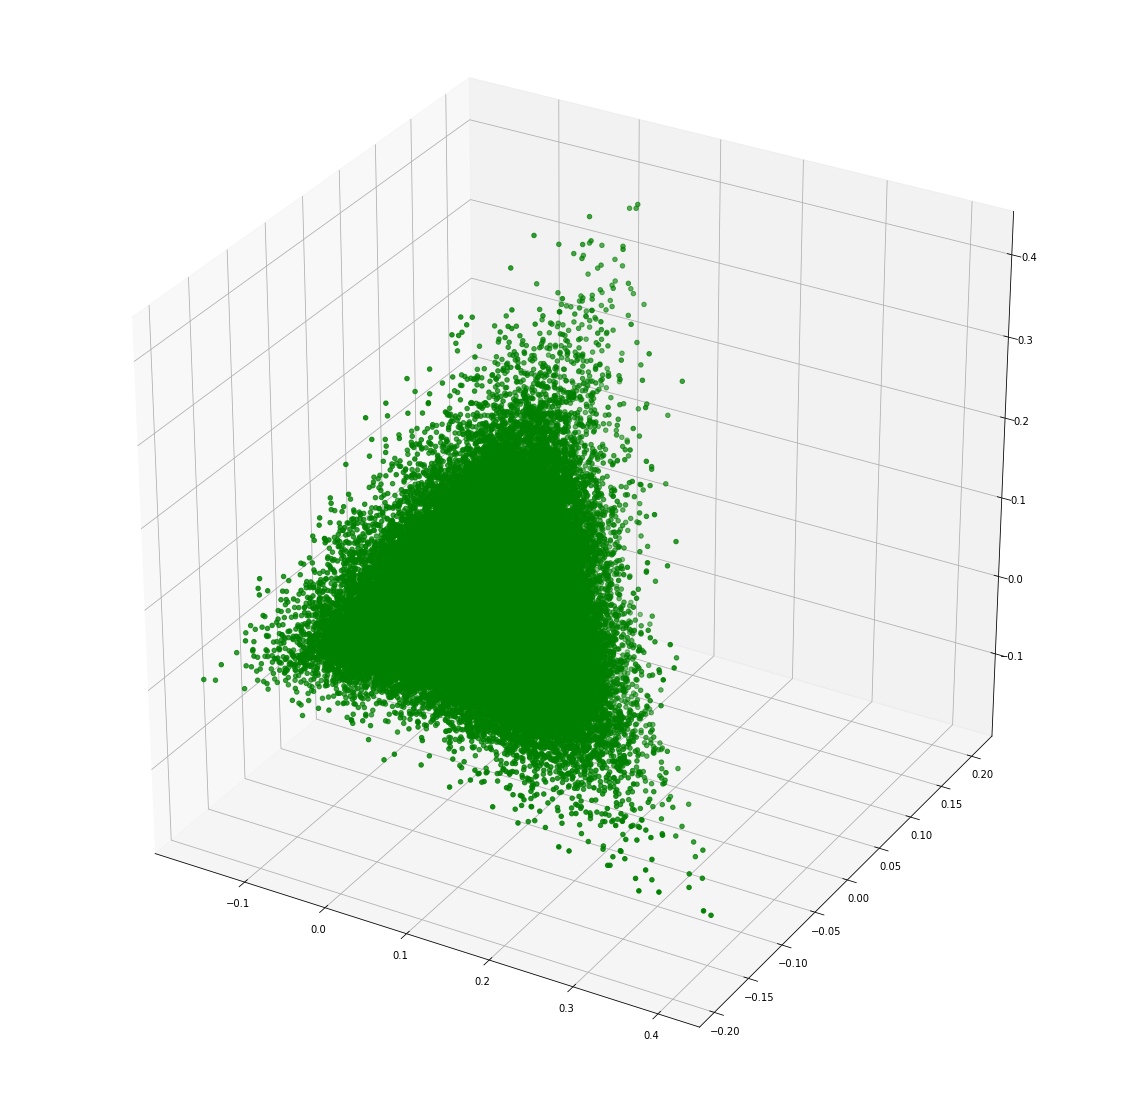

In [16]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
zdata = pca_result[:,0]
xdata = pca_result[:,1]
ydata = pca_result[:,2]
ax.scatter3D(xdata, ydata, zdata, c="green")##, cmap='blue');
plt.savefig('clusters_2_mers_all_samples_pca.png', dpi=600, format='png')